<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


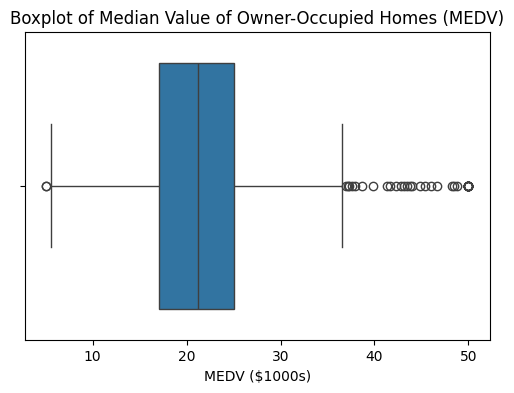

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["MEDV"])
plt.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
plt.xlabel("MEDV ($1000s)")
plt.show()

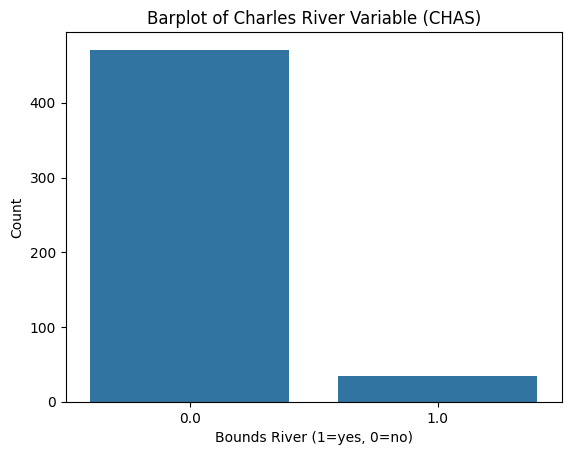

In [8]:
sns.countplot(x=df["CHAS"])
plt.title("Barplot of Charles River Variable (CHAS)")
plt.xlabel("Bounds River (1=yes, 0=no)")
plt.ylabel("Count")
plt.show()

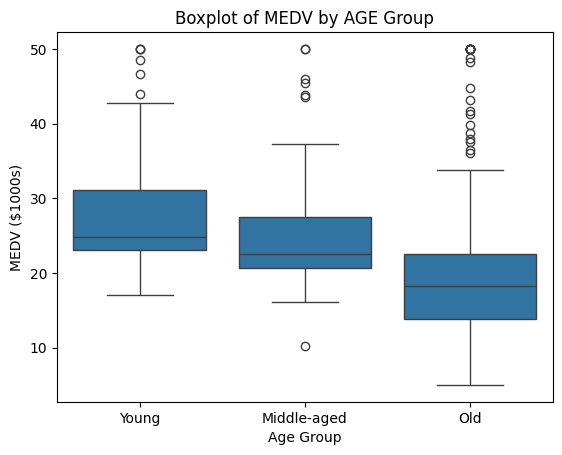

In [9]:
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=["Young", "Middle-aged", "Old"])
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df)
plt.title("Boxplot of MEDV by AGE Group")
plt.xlabel("Age Group")
plt.ylabel("MEDV ($1000s)")
plt.show()

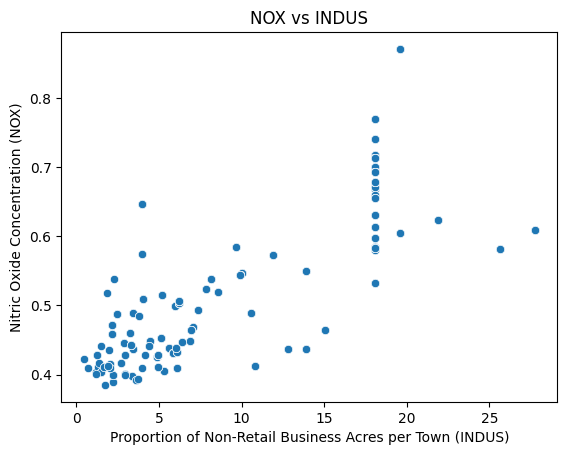

In [10]:
sns.scatterplot(x='INDUS', y='NOX', data=df)
plt.title("NOX vs INDUS")
plt.xlabel("Proportion of Non-Retail Business Acres per Town (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.show()

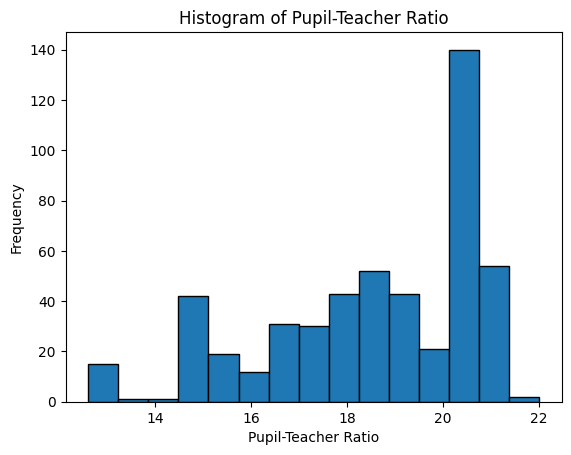

In [11]:
plt.hist(df['PTRATIO'], bins=15, edgecolor='black')
plt.title("Histogram of Pupil-Teacher Ratio")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()


**Null Hypothesis (H₀):** There is no relationship between the weighted distance to Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV).  
**Alternate Hypothesis (H₁):** There is a significant relationship between the weighted distance to Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV).



Based on the visualizations and statistical summaries, there are clear relationships between several features (like NOX, AGE, PTRATIO, and DIS) and the median value of homes. The Charles River proximity (CHAS) is categorical and shows fewer homes near the river. In the hypothesis test below, we'll determine the significance of DIS on MEDV.


In [13]:

from sklearn.linear_model import LinearRegression

X = df[['DIS']]
y = df['MEDV']
model = LinearRegression()
model.fit(X, y)

print(f"Coefficient for DIS: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Coefficient for DIS: 1.0916
Intercept: 18.3901



The coefficient indicates that for each additional unit of weighted distance to employment centers (DIS), the median value of homes increases by the coefficient value (in $1000s), assuming a linear relationship.
